In [40]:
# USING ICHIMOKU TRADING ALGORITHM AND ALPHA VANTAGE API TO ANALYSE THE WEEKLY MARKET UPS AND DOWNS

In [41]:
!pip install pandas_ta matplotlib
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as pta

In [63]:
import requests
import json

api_key = 'SQ524XDIJ5M55EMA'
symbol = 'IBM'
output_file = 'output.json'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=IBM&apikey={api_key}'

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    with open(output_file, 'w') as file:
        json.dump(data, file)

    print('JSON file saved successfully.')
else:
    print('Error occurred while fetching data from the API.')



JSON file saved successfully.


In [61]:

# import pandas as pd



#df = pd.read_json("/content/output.json")
# # df = df["Time Series (5min)"].apply(pd.Series)

# df.to_csv("output.csv", index=False)
# df.head(10)

# df = pd.read_csv("output.csv")



# df.to_csv("output_modified.csv", index=False)
# x = pd.read_csv("output_modified.csv")
# # print(x.size)

# df = df.drop(df.index[2:6]) # Drop the first six rows
#df = df.drop(columns=df.columns[0])

# x = x.rename(columns={'Unnamed: 0': 'open', 'Unnamed: 1': 'high', 'Unnamed: 2': 'low' , 'Unnamed: 3': 'close', 'Unnamed: 4': 'volume'})
# print(x.head())


In [64]:

df = pd.read_json("/content/output.json")
df = df["Weekly Time Series"].apply(pd.Series)

# Extract the date and time from the index and add it as a separate column
df["datetime"] = df.index

df.to_csv("output.csv", index=False)

df = pd.read_csv("output.csv")
df = df.drop(range(6))
df.head(10)

,0,1. open,2. high,3. low,4. close,5. volume,datetime
6,NaN,136.00,139.469,135.8216,137.48,24228597.0,2023-06-16
7,NaN,133.12,136.100,131.8800,135.30,21174178.0,2023-06-09
8,NaN,129.56,133.120,127.4600,132.42,24339245.0,2023-06-02
9,NaN,127.50,129.660,125.0100,128.89,21029979.0,2023-05-26
10,NaN,123.00,128.290,122.3400,127.26,18284524.0,2023-05-19
11,NaN,123.76,123.920,120.5500,122.84,20404364.0,2023-05-12
12,NaN,126.35,126.750,121.7563,123.65,21164660.0,2023-05-05
13,NaN,125.55,127.250,124.5600,126.41,20644224.0,2023-04-28
14,NaN,128.30,130.980,125.2700,125.73,30341128.0,2023-04-21
15,NaN,129.83,131.105,126.0000,128.14,19506500.0,2023-04-14


In [45]:
pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)


(         ISA_9  ISB_26    ITS_9   IKS_26  ICS_26
 6          NaN     NaN      NaN      NaN  140.16
 7          NaN     NaN      NaN      NaN  147.05
 8          NaN     NaN      NaN      NaN  148.67
 9          NaN     NaN      NaN      NaN  148.37
 10         NaN     NaN      NaN      NaN  147.64
 ...        ...     ...      ...      ...     ...
 1233  111.0475   107.5  114.625  113.875     NaN
 1234  111.0475   107.5  113.435  113.875     NaN
 1235  111.0475   107.5  113.280  113.875     NaN
 1236  111.0475   107.5  107.965  110.435     NaN
 1237  111.0475   107.5  106.310  109.375     NaN
 
 [1232 rows x 5 columns],
          ISA_9  ISB_26
 1238  111.5475  107.50
 1239  112.1875  107.50
 1240  114.6250  107.50
 1241  115.3900  107.50
 1242  116.0475  107.50
 1243  116.1100  107.50
 1244  116.1100  107.50
 1245  116.1100  107.50
 1246  116.0475  107.50
 1247  114.2825  107.50
 1248  113.8750  107.50
 1249  113.8750  107.50
 1250  113.8750  107.50
 1251  113.8750  107.50
 1252  112.5

In [46]:
pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=9, kijun=26, senkou=52, include_chikou=True, offset=0)

(         ISA_9  ISB_26    ITS_9   IKS_26  ICS_26
 6          NaN     NaN      NaN      NaN  140.16
 7          NaN     NaN      NaN      NaN  147.05
 8          NaN     NaN      NaN      NaN  148.67
 9          NaN     NaN      NaN      NaN  148.37
 10         NaN     NaN      NaN      NaN  147.64
 ...        ...     ...      ...      ...     ...
 1233  111.0475   107.5  114.625  113.875     NaN
 1234  111.0475   107.5  113.435  113.875     NaN
 1235  111.0475   107.5  113.280  113.875     NaN
 1236  111.0475   107.5  107.965  110.435     NaN
 1237  111.0475   107.5  106.310  109.375     NaN
 
 [1232 rows x 5 columns],
          ISA_9  ISB_26
 1238  111.5475  107.50
 1239  112.1875  107.50
 1240  114.6250  107.50
 1241  115.3900  107.50
 1242  116.0475  107.50
 1243  116.1100  107.50
 1244  116.1100  107.50
 1245  116.1100  107.50
 1246  116.0475  107.50
 1247  114.2825  107.50
 1248  113.8750  107.50
 1249  113.8750  107.50
 1250  113.8750  107.50
 1251  113.8750  107.50
 1252  112.5

In [47]:
ichimoku = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=9, kijun=26, senkou=52, include_chikou=True, offset=30)
print(ichimoku)

(         ISA_9   ISB_26    ITS_9  IKS_26  ICS_26
6          NaN      NaN      NaN     NaN     NaN
7          NaN      NaN      NaN     NaN     NaN
8          NaN      NaN      NaN     NaN     NaN
9          NaN      NaN      NaN     NaN     NaN
10         NaN      NaN      NaN     NaN     NaN
...        ...      ...      ...     ...     ...
1233  101.5100  104.225  117.470  107.50  113.50
1234  100.6950  103.410  114.940  107.50  107.87
1235   99.6650  101.635  111.845  110.94  108.62
1236   99.5550  101.020  110.905  110.94  110.00
1237   99.1925   99.980  111.155  110.94  109.00

[1232 rows x 5 columns],          ISA_9  ISB_26
1238  111.5475  107.50
1239  112.1875  107.50
1240  114.6250  107.50
1241  115.3900  107.50
1242  116.0475  107.50
1243  116.1100  107.50
1244  116.1100  107.50
1245  116.1100  107.50
1246  116.0475  107.50
1247  114.2825  107.50
1248  113.8750  107.50
1249  113.8750  107.50
1250  113.8750  107.50
1251  113.8750  107.50
1252  112.5300  107.50
1253  113.0000  1

In [48]:
pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=9, kijun=26, senkou=52, include_chikou=True, offset=30)[0]

,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1233,101.5100,104.225,117.470,107.50,113.50
1234,100.6950,103.410,114.940,107.50,107.87
1235,99.6650,101.635,111.845,110.94,108.62
1236,99.5550,101.020,110.905,110.94,110.00


In [49]:

pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=9, kijun=26, senkou=52, offset=30)[0]['ITS_9']


6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
         ...   
1233    117.470
1234    114.940
1235    111.845
1236    110.905
1237    111.155
Name: ITS_9, Length: 1232, dtype: float64

In [50]:
df['TenkanSen'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=9, kijun=26, senkou=52, include_chikou=True, offset=30)[0]['ITS_9']
df

,0,1. open,2. high,3. low,4. close,5. volume,datetime,TenkanSen
6,NaN,136.00,139.469,135.8216,137.48,24228597.0,2023-06-16,NaN
7,NaN,133.12,136.100,131.8800,135.30,21174178.0,2023-06-09,NaN
8,NaN,129.56,133.120,127.4600,132.42,24339245.0,2023-06-02,NaN
9,NaN,127.50,129.660,125.0100,128.89,21029979.0,2023-05-26,NaN
10,NaN,123.00,128.290,122.3400,127.26,18284524.0,2023-05-19,NaN
...,...,...,...,...,...,...,...,...
1233,NaN,113.00,122.120,107.5600,109.00,58626000.0,1999-12-10,117.470
1234,NaN,104.94,112.870,102.1200,111.87,37670000.0,1999-12-03,114.940
1235,NaN,105.50,109.870,101.8100,105.00,37165600.0,1999-11-26,111.845
1236,NaN,96.00,105.120,92.6200,103.94,61550800.0,1999-11-19,110.905


In [51]:
df = pd.concat([df, ichimoku[0], ichimoku[1]], axis=1)
df

,0,1. open,2. high,3. low,4. close,5. volume,datetime,TenkanSen,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,ISA_9,ISB_26
6,NaN,136.00,139.469,135.8216,137.48,24228597.0,2023-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,133.12,136.100,131.8800,135.30,21174178.0,2023-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,129.56,133.120,127.4600,132.42,24339245.0,2023-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,127.50,129.660,125.0100,128.89,21029979.0,2023-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,123.00,128.290,122.3400,127.26,18284524.0,2023-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.2500,110.94
1260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.6550,110.94
1261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.5775,110.94
1262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.2000,110.94


In [52]:

df2 = pd.read_json("/content/output.json")
df2 = df2["Weekly Time Series"].apply(pd.Series)

# Extract the date and time from the index and add it as a separate column
df2["datetime"] = df2.index

df2.to_csv("output.csv", index=False)

df2 = pd.read_csv("output.csv")
df2 = df2.drop(range(6))

# Then add a column for each Ichimoku indicator output to that dataset.
# Each column represents the output of the First Ichimoku Variable tuple and its specific column.
df2['Tenkan'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ITS_9']
df2['Kijun'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['IKS_26']
df2['SenkanA'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISA_9']
df2['SenkanB'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISB_26']
df2['Chiko'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ICS_26']
df2

,0,1. open,2. high,3. low,4. close,5. volume,datetime,Tenkan,Kijun,SenkanA,SenkanB,Chiko
6,NaN,136.00,139.469,135.8216,137.48,24228597.0,2023-06-16,NaN,NaN,NaN,NaN,140.16
7,NaN,133.12,136.100,131.8800,135.30,21174178.0,2023-06-09,NaN,NaN,NaN,NaN,147.05
8,NaN,129.56,133.120,127.4600,132.42,24339245.0,2023-06-02,NaN,NaN,NaN,NaN,148.67
9,NaN,127.50,129.660,125.0100,128.89,21029979.0,2023-05-26,NaN,NaN,NaN,NaN,148.37
10,NaN,123.00,128.290,122.3400,127.26,18284524.0,2023-05-19,NaN,NaN,NaN,NaN,147.64
...,...,...,...,...,...,...,...,...,...,...,...,...
1233,NaN,113.00,122.120,107.5600,109.00,58626000.0,1999-12-10,114.625,113.875,111.0475,107.5,NaN
1234,NaN,104.94,112.870,102.1200,111.87,37670000.0,1999-12-03,113.435,113.875,111.0475,107.5,NaN
1235,NaN,105.50,109.870,101.8100,105.00,37165600.0,1999-11-26,113.280,113.875,111.0475,107.5,NaN
1236,NaN,96.00,105.120,92.6200,103.94,61550800.0,1999-11-19,107.965,110.435,111.0475,107.5,NaN


In [53]:
df3 = pd.read_json("/content/output.json")
df3 = df3["Weekly Time Series"].apply(pd.Series)

# Extract the date and time from the index and add it as a separate column
df3["datetime"] = df3.index

df3.to_csv("output.csv", index=False)

df3 = pd.read_csv("output.csv")
df3 = df3.drop(range(6))

# Specify the lenghts for each indicator

TS = 9
KS = 26
SS = 52
CS = 26
OS = 0

# Then add a column for each Ichimoku indicator output to that dataset.
# Each column represents the output of the First Ichimoku Variable tuple and its specific column.
df3['Tenkan'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'ITS_{TS}']
df3['Kijun'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'IKS_{KS}']
df3['SenkanA'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'ISA_{TS}']
df3['SenkanB'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'ISB_{KS}']
df3['Chiko'] = pta.ichimoku(high=df['2. high'], low=df['3. low'], close=df['4. close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'ICS_{KS}']

df3

,0,1. open,2. high,3. low,4. close,5. volume,datetime,Tenkan,Kijun,SenkanA,SenkanB,Chiko
6,NaN,136.00,139.469,135.8216,137.48,24228597.0,2023-06-16,NaN,NaN,NaN,NaN,140.16
7,NaN,133.12,136.100,131.8800,135.30,21174178.0,2023-06-09,NaN,NaN,NaN,NaN,147.05
8,NaN,129.56,133.120,127.4600,132.42,24339245.0,2023-06-02,NaN,NaN,NaN,NaN,148.67
9,NaN,127.50,129.660,125.0100,128.89,21029979.0,2023-05-26,NaN,NaN,NaN,NaN,148.37
10,NaN,123.00,128.290,122.3400,127.26,18284524.0,2023-05-19,NaN,NaN,NaN,NaN,147.64
...,...,...,...,...,...,...,...,...,...,...,...,...
1233,NaN,113.00,122.120,107.5600,109.00,58626000.0,1999-12-10,114.625,113.875,111.0475,107.5,NaN
1234,NaN,104.94,112.870,102.1200,111.87,37670000.0,1999-12-03,113.435,113.875,111.0475,107.5,NaN
1235,NaN,105.50,109.870,101.8100,105.00,37165600.0,1999-11-26,113.280,113.875,111.0475,107.5,NaN
1236,NaN,96.00,105.120,92.6200,103.94,61550800.0,1999-11-19,107.965,110.435,111.0475,107.5,NaN


In [67]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.2 MB/s eta 0:00:00


<ipython-input-70-1974ed7293a8>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


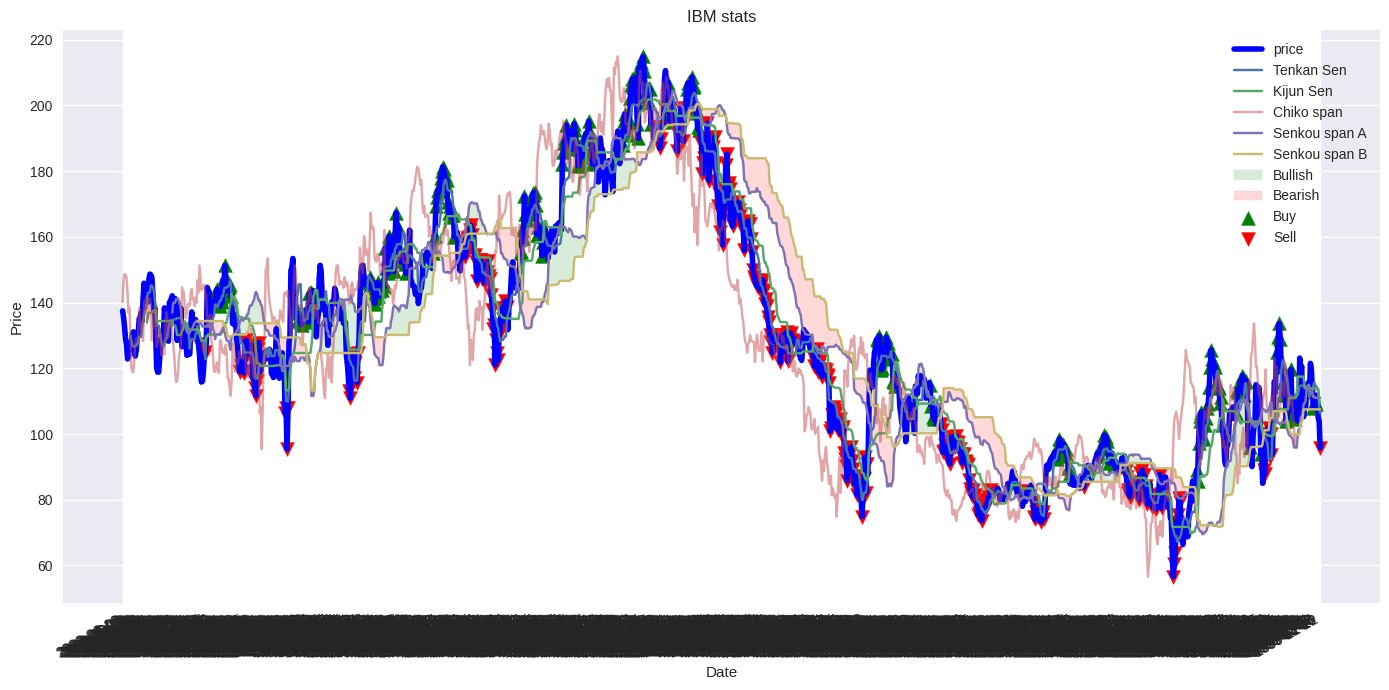

In [70]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import pandas_ta as pta

plt.style.use('seaborn')
plt.figure(figsize=(14,7))

# Load data in another dataframe
df3 = pd.read_json("/content/output.json")
df3 = df3["Weekly Time Series"].apply(pd.Series)

# Extract the date and time from the index and add it as a separate column
df3["datetime"] = df3.index

df3.to_csv("output.csv", index=False)

df3 = pd.read_csv("output.csv")
df3 = df3.drop(range(6))

# Add default Ichimoku
df3['SenkanA'] = pta.ichimoku(high=df3['2. high'], low=df3['3. low'], close=df3['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISA_9']
df3['SenkanB'] = pta.ichimoku(high=df3['2. high'], low=df3['3. low'], close=df3['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISB_26']
df3['Tenkan'] = pta.ichimoku(high=df3['2. high'], low=df3['3. low'], close=df3['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ITS_9']
df3['Kijun'] = pta.ichimoku(high=df3['2. high'], low=df3['3. low'], close=df3['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['IKS_26']
df3['Chiko'] = pta.ichimoku(high=df3['2. high'], low=df3['3. low'], close=df3['4. close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ICS_26']

# Determine weeks to show in chart
days = 1232
dates = df3['datetime'].tail(days)
price = df3['4. close'].tail(days)
Tenkan = df3['Tenkan'].tail(days)
Kijun = df3['Kijun'].tail(days)
Chiko = df3['Chiko'].tail(days)
SenkouA = df3['SenkanA'].tail(days)
SenkouB = df3['SenkanB'].tail(days)

# Adding lines
plt.plot_date(dates, price, linestyle='solid', linewidth=4, fmt='b', marker=None, label='price')
plt.plot(dates, Tenkan, label='Tenkan Sen')
plt.plot(dates, Kijun, label='Kijun Sen')
plt.plot(dates, Chiko, label='Chiko span', alpha=0.5)
plt.plot(dates, SenkouA, label='Senkou span A')
plt.plot(dates, SenkouB, label='Senkou span B')

# Fill Kumo Cloud
plt.fill_between(dates, SenkouA, SenkouB,
                 where=(SenkouA >= SenkouB), color='green', alpha=0.15,
                label='Bullish')
plt.fill_between(dates, SenkouA, SenkouB,
                 where=(SenkouA <= SenkouB), color='red', alpha=0.15,
                label='Bearish')

# Generate buy and sell signals
buy_signals = (df3['Tenkan'] > df3['Kijun']) & (df3['Tenkan'] > df3['SenkanA']) & (df3['Tenkan'] > df3['SenkanB'])
sell_signals = (df3['Tenkan'] < df3['Kijun']) & (df3['Tenkan'] < df3['SenkanA']) & (df3['Tenkan'] < df3['SenkanB'])

# Plot buy signals
plt.scatter(dates[buy_signals], price[buy_signals], color='green', marker='^', s=100, label='Buy')

# Plot sell signals
plt.scatter(dates[sell_signals], price[sell_signals], color='red', marker='v', s=100, label='Sell')

plt.gcf().autofmt_xdate()

plt.title('IBM stats')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
